In [1]:
# Import library
import pandas as pd

# Load data
df = pd.read_csv('superstore_train.csv', encoding='latin1')

# Cek struktur awal
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Persiapan dan Pembersihan Data

In [2]:
# Konversi kolom tanggal ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Fokus pada data tahun 2017 (karena 2019 tidak tersedia)
df_2017 = df[df['Order Date'].dt.year == 2017].copy()

# Tambahkan kolom GMV sebagai total penjualan (Sales sudah termasuk diskon)
df_2017['GMV'] = df_2017['Sales']

# Ringkasan Penjualan Tahun 2017

In [4]:
# Hitung metrik utama
total_revenue = df_2017['GMV'].sum()
total_orders = df_2017['Order ID'].nunique()
total_quantity = df_2017['Quantity'].sum()

# Rata-rata barang dan spending per order
avg_items_per_order = total_quantity / total_orders
avg_spending_per_order = total_revenue / total_orders

# Cetak hasil
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Avg Items per Order: {avg_items_per_order:.2f}")
print(f"Avg Spending per Order: ${avg_spending_per_order:.2f}")

Total Revenue: $586,394.42
Total Orders: 1341
Total Quantity Sold: 10085
Avg Items per Order: 7.52
Avg Spending per Order: $437.28


# GMV Harian, Mingguan, dan Bulanan

In [5]:
# Tambahkan kolom waktu
df_2017['Order Day'] = df_2017['Order Date'].dt.date
df_2017['Order Week'] = df_2017['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)
df_2017['Order Month'] = df_2017['Order Date'].dt.to_period('M').apply(lambda r: r.start_time)

# Agregasi GMV
daily = df_2017.groupby('Order Day')['GMV'].sum()
weekly = df_2017.groupby('Order Week')['GMV'].sum()
monthly = df_2017.groupby('Order Month')['GMV'].sum()

# Tampilkan 5 data pertama
print(daily.head())
print(weekly.head())
print(monthly.head())

Order Day
2017-01-01     526.926
2017-01-02     740.214
2017-01-03      38.880
2017-01-06      33.740
2017-01-07    3395.590
Name: GMV, dtype: float64
Order Week
2016-12-26      526.926
2017-01-02     5101.404
2017-01-09     7818.979
2017-01-16    13494.569
2017-01-23     1901.020
Name: GMV, dtype: float64
Order Month
2017-01-01    29873.8980
2017-02-01    16258.3440
2017-03-01    35966.1898
2017-04-01    31611.7931
2017-05-01    32956.1588
Name: GMV, dtype: float64


# Top Produk Revenue dan Bundling

In [6]:
# Ambil 3 bulan terakhir (Oktober–Desember)
df_q4 = df_2017[df_2017['Order Date'].dt.month.isin([10, 11, 12])]

# Top 10 produk revenue tertinggi
top_products = df_q4.groupby('Product Name')['GMV'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Bundling (produk sering dibeli bersama dalam 1 order)
from itertools import combinations
from collections import Counter

orders = df_q4.groupby('Order ID')['Product Name'].apply(list)
multi_item_orders = orders[orders.apply(lambda x: len(x) > 1)]

bundle_counter = Counter()
for order in multi_item_orders:
    for pair in combinations(set(order), 2):
        bundle_counter[pair] += 1

top_bundles = bundle_counter.most_common(10)
print(top_bundles)

Product Name
Canon imageCLASS 2200 Advanced Copier               21699.938
Cubify CubeX 3D Printer Triple Head Print            7999.980
3D Systems Cube Printer, 2nd Generation, Magenta     5199.960
Adjustable Depth Letter/Legal Cart                   4028.412
Hewlett Packard LaserJet 3310 Copier                 2879.952
Tennsco Double-Tier Lockers                          2835.252
Hon 94000 Series Round Tables                        2665.620
Hoover Shoulder Vac Commercial Portable Vacuum       2504.740
Hon GuestStacker Chair                               2493.370
ClearOne CHATAttach 160 -Â speaker phone             2479.960
Name: GMV, dtype: float64
[(('KI Adjustable-Height Table', 'Staples'), 2), (('#10- 4 1/8" x 9 1/2" Security-Tint Envelopes', 'SANFORD Liquid Accent Tank-Style Highlighters'), 1), (('#10- 4 1/8" x 9 1/2" Security-Tint Envelopes', 'Dax Clear Box Frame'), 1), (('SANFORD Liquid Accent Tank-Style Highlighters', 'Dax Clear Box Frame'), 1), (('DataProducts Ampli Magnifier

# Analisis Kota Teratas

In [ ]:
city = df_2017.groupby('City').agg(
    total_orders=('Order ID', 'nunique'),
    total_gmv=('GMV', 'sum')
)
city['avg_spending'] = city['total_gmv'] / city['total_orders']

# Top 5 kota berdasarkan kriteria berbeda
print("Top Kota by Order:")
print(city.sort_values('total_orders', ascending=False).head())

print("Top Kota by Total GMV:")
print(city.sort_values('total_gmv', ascending=False).head())

print("Top Kota by Avg Spending:")
print(city.sort_values('avg_spending', ascending=False).head())

# Analisis Tren Bulanan

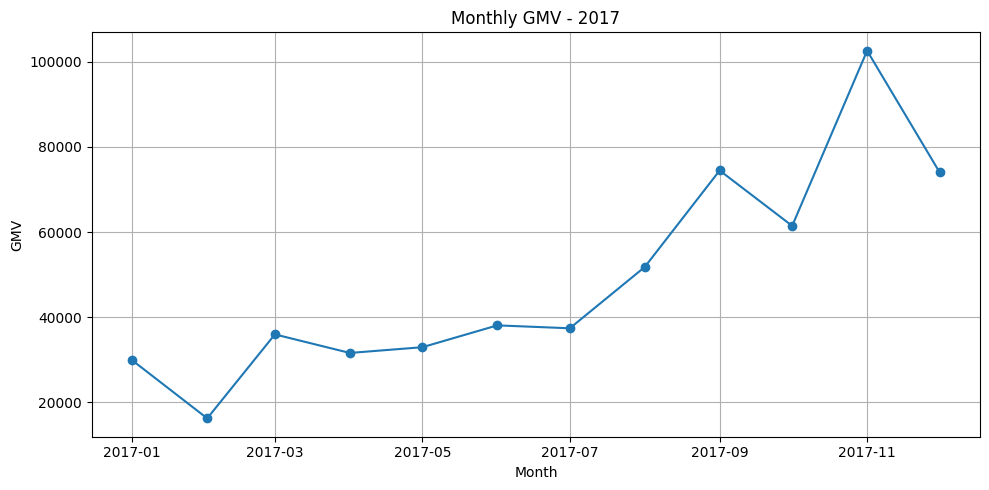

In [7]:
import matplotlib.pyplot as plt

monthly_gmv = df_2017.groupby(df_2017['Order Date'].dt.to_period('M'))['GMV'].sum()
monthly_gmv.index = monthly_gmv.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_gmv, marker='o')
plt.title('Monthly GMV - 2017')
plt.xlabel('Month')
plt.ylabel('GMV')
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Forecasting (ARIMA vs Moving Average)

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Time series harian jumlah order
daily_orders = df_2017.groupby('Order Date')['Order ID'].nunique().asfreq('D', fill_value=0)
train = daily_orders[:'2017-11-30']
test = daily_orders['2017-12-01':]

# Model 1: Moving Average
ma_pred = pd.Series(train.rolling(30).mean().iloc[-1], index=test.index)

# Model 2: ARIMA
model = ARIMA(train, order=(1,1,1))
result = model.fit()
arima_pred = result.forecast(steps=len(test))

# Evaluasi tanpa hari dengan 0 order
test_nonzero = test[test > 0]
ma_mape = mean_absolute_percentage_error(test_nonzero, ma_pred[test_nonzero.index])
arima_mape = mean_absolute_percentage_error(test_nonzero, arima_pred[test_nonzero.index])

print(f"MAPE Moving Average (tanpa 0): {ma_mape:.4f}")
print(f"MAPE ARIMA (tanpa 0): {arima_mape:.4f}")

MAPE Moving Average (tanpa 0): 1.0147
MAPE ARIMA (tanpa 0): 0.9286


# Insight Bisnis & Rekomendasi

1. Penjualan meningkat tajam di bulan November → Manfaatkan momen seperti Black Friday.
2. Produk high-end mendominasi revenue → Cocok untuk bundling premium.
3. Kota besar seperti NYC & LA → targetkan promosi geografis.
4. ARIMA (1,1,1) cocok untuk memprediksi jumlah order harian.

* Link GitHub
https://github.com/H7-DL/time-series-forecasting